# **Варіант:**
* Breast Cancer Wisconsin цільова ознака: diagnosis

Репозиторій - https://github.com/TheKeyboard3/MLB_MLOps.git

Підготовка даних

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/wdbc.data', sep=',', names = ['id','diagnosis','radius1','texture1','perimeter1','area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimensions1','radius2','texture2','perimeter2','area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimensions2','radius3','texture3','perimeter3','area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimensions3'])

In [3]:
df.to_csv("data.csv")

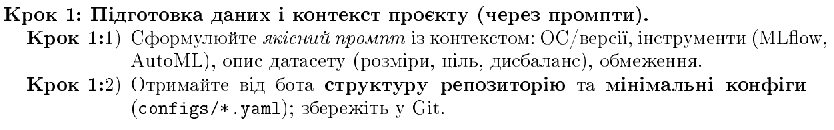

Структура проєкту:
```
mlops_h2o_project/
├── configs/
│   └── config.yaml          # Всі параметри тут (шляхи, гіперпараметри)
├── data/
│   ├── raw/                 # Сюди покласти ваш вихідний CSV
│   └── processed/           # Для збереження очищених даних (якщо треба)
├── mlruns/                  # Тут MLFlow буде зберігати локальні метрики та артифакти
├── notebooks/
│   └── 01_h2o_automl.ipynb  # Основний робочий зошит
├── src/                     # Допоміжний код (щоб не засмічувати ноутбук)
├── .gitignore               # Важливо для git
├── README.md                # Опис проекту
└── requirements.txt         # Залежності
```

requirements.txt:

Отримано від Google Gemini

.gitignore:

Отримано від Google Gemini. shell.nix додано оскільки вимагається дистрибутивом, на якому виконується робота, але не є необхідним для інших.

config.yaml:

Отримано від Google Gemini. Змінено всі шляхи з відносних відносно файлу конфігурації у відносні відносно кореня проєкту.
Змінено часовий ліміт AutoML на 30 хвилин.

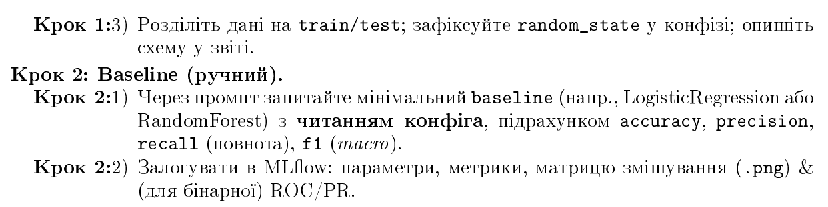

train.py:

Отримано від Google Gemini. Виконує завантаження даних, поділ на навчальну та тестову вибірки, scaling, тренування та збереження моделі логістичної регресії, її резльтатів та даних тренування.

evaluate.py:

Отримано від Google Gemini. Завантажує модель та тестову дані, вимірює метрики accuracy, precision, recall, та f1; зберігає їх у лог MLFlow

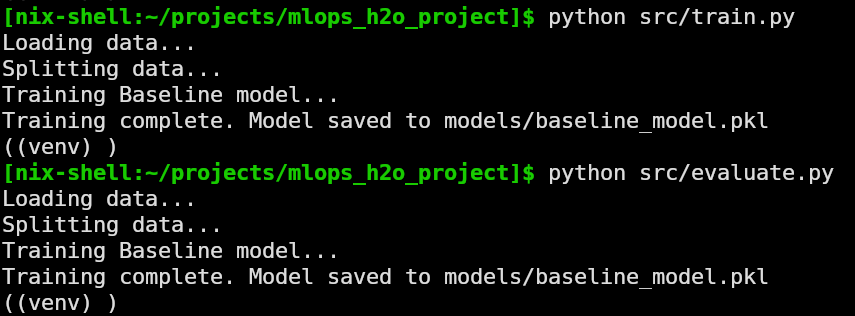

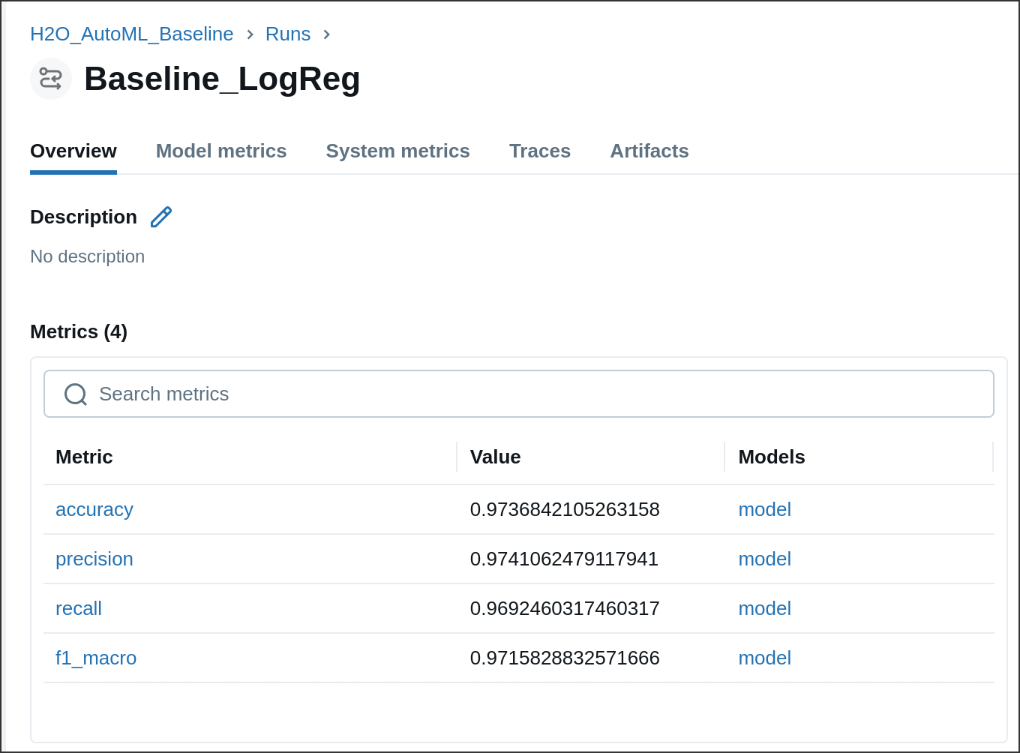

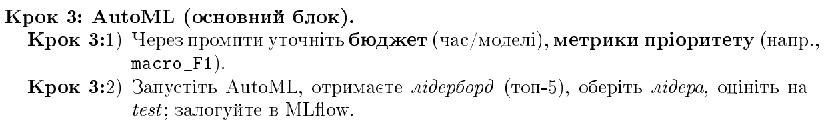

automl_run.py:

Отримано від Google Gemini. Ініціалізує h2o кластер, завантажує дані, виконує навчання, тестує модель-лідера, логує результати у MLFlow, зберігає модель, зупиняє кластер. Змінено код зуппинки кластера через вкиористання застарілих методів.

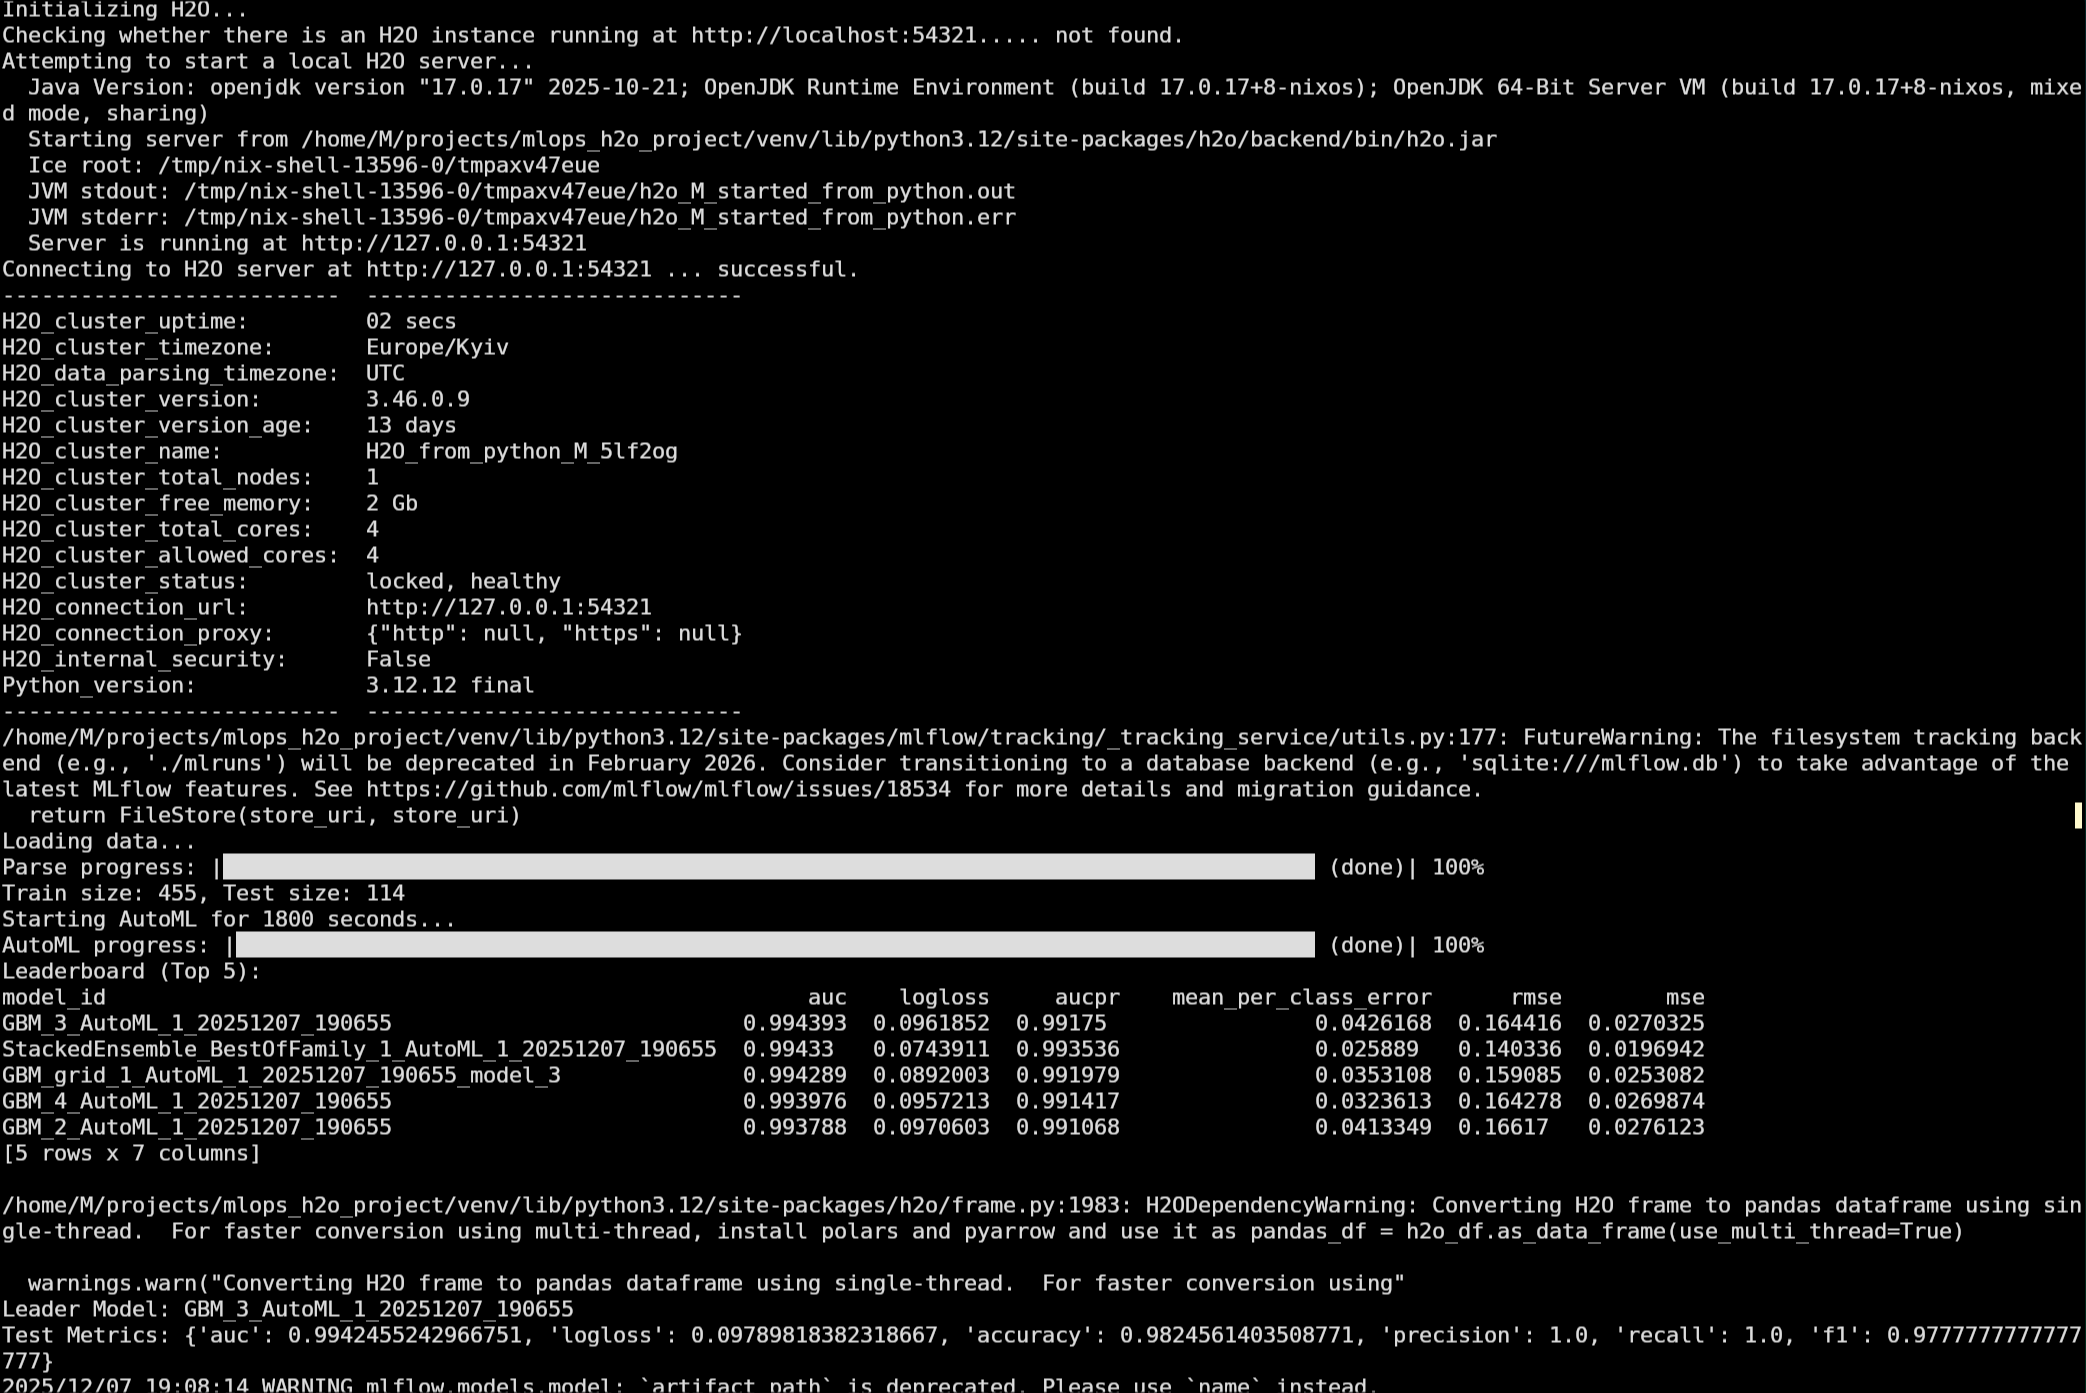

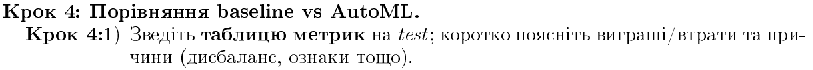

| metric | baseline | AutoML |
| - | - | - |
| accuracy | 0.974 | 0.982 |
| f1	| 0.972 | 0.978 | 
| precision | 0.974 | 1 |
| recall | 0.969 | 1 |

AutoML досяг значно кращого результату ймовірно через кращий вибір моделі та довший час навчання.

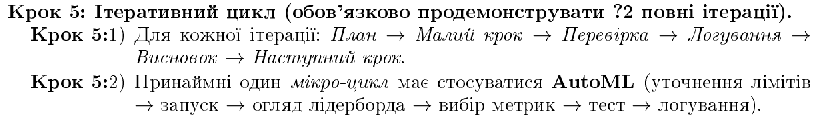

План:
* Модель - baseline
* Метрика - f1
* Цільове значення >= 0.98

Зміна: використання GridSearchCV для підбору параметрів

| metric | baseline |
| - | - |
| accuracy | 0.982 |
| f1	| 0.981 |
| precision | 0.981 |
| recall | 0.981 |

Ціль досягнено

Зміна: Нові параметри GridSearchCV, збільшення кількості ітерацій до 3000

| metric | baseline |
| - | - |
| accuracy | 0.982 |
| precision | 0.981 |
| recall | 0.981 |
| f1_macro | 0.981 |

Без змін. Ціль не досягнено

План:
* Модель - AutoML
* Метрика - f1
* Цільове значення >= 0.98

Зміна: зняття обмеження на кількіть моделей, вимкнення ранньої зупинки.

| metric | AutoML |
| - | - |
| accuracy | 0.991 |
| f1	| 0.989 | 
| precision | 1 |
| recall | 1 |

Ціль досягнено

Підвищуємо ціль до 0.99

Зміна: збільшення кількості сегментів для крос-валідації до 10, зміна метрики сортування з AUC-ROC на AUCPR.

| metric | AutoML |
| - | - |
| accuracy | 0.991 |
| f1	| 0.989 | 
| precision | 1 |
| recall | 1 |

Без змін. Ціль не досягнено

Фінальне порівняння:

| metric | baseline base | baseline 1 | baseline 2 | AutoML base | AutoML 1 | AutoML 2 |
| - | - | - | - | - | - | - |
| accuracy | 0.974 | 0.982 | 0.982 | 0.982 | 0.991 | 0.991 |
| f1	| 0.972 | 0.981 | 0.981 | 0.978 | 0.989 | 0.989 |
| precision | 0.974 | 0.981 | 0.981 | 1 | 1 | 1 |
| recall | 0.969 | 0.981 | 0.981 | 1 | 1 | 1 |

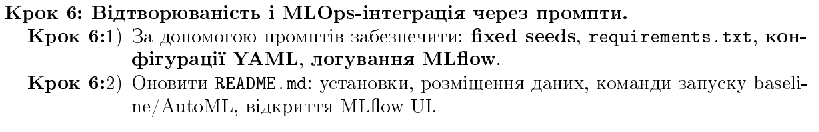

Контрольні питання:
1. Що таке MLOps і чим він відрізняється від класичного DevOps у контексті залежності від даних та моделей? MLOps має декілька додаткових проблем: нестабільність та старіння моделей, необхідінсть постійного переоцінювання якості, забезпечення відворюваності.
2. Назвіть основні етапи життєвого циклу ML-проєкту та коротко поясніть роль кожного. Керування даними - збір, зберігання, очищення, та версіювання даних. Експериментування - проведення серії експериментів з різними конфігураціями. Трекінг експериментів - всі спроби тренування моделей логуються. Вибір і затвердження моделі - обирається модель, що досягла найкращої якості. Розгортання моделі - модель інтегрується у цільове середовище. Моніторинг продуктивності та якості - збір та аналіз даних про використанян моделі. Цикл повторного навчання - на основі нових даних чи критеріїв запускається повторне навчання моделі.
4. Які вимоги до структури ML-проєкту забезпечують відтворюваність (директорії, файли, інструкції)? Фіксація випадковості заданням random_state в конфігурації, фіксація середовища у файлі requirements.txt або environment.yml. Фіксація даних - опис джерела даних і точної версії набору (дата або хеш).
5. Для чого потрібен конфігураційний підхід і що типово зберігають у config.yaml? Забезпечує можливість змінити параметри моделі без зміни коду. У config.yaml зберігають шляхи до даних та результатів, random_state, та гіперпараметри моделей.
6. Що обов’язково слід логувати під час трекінгу експериментів (параметри, метрики, артефакти) і чому? гіперпараметри за якими модель тренувалася, метрики на тестовому набрі (або кросвалідації), саму модель. Це забезпечить можливість отримати попередню модель, та навчити модель з тими самими гіперпараметрами на інших даних.
7. Поясніть різницю між train, validation, test наборами та навіщо фіксувати random_state. train - набрі, на якому тренується модель, test - оцінка якості моделі, validation - для підбору гіперпараметрів. random_state необхідно фіксувати для забезпечення відтворюваності результатів тренування з тими самими гіперпараметриами.
8. Які типові причини деградації якості моделі в продакшні (data drift, concept drift) і як їх відстежувати? Зміни в поведінці користувачів/ринку/сенсорів. Потрібен моніторинг та регулярна перевірка моделей.
9. Які кроки включає мінімальний CI/CD-процес для ML (перевірки, тести, побудова, розгортання) і які ризики він знижує? Формулювання задачі, збір і розуміння даних, попередня обробка даних та інженерія ознак, вибір і навчання моделі, оцінювання якості моделі, впровадженян моделі, моніторинг і супровід моделі.
10. Які критерії вибору «найкращої» моделі в AutoML, окрім значення однієї метрики (стабільність, інтерпретованість, ресурси)? Також важливі структура помилок та наявність перенавчання.
11. Які стратегії безпечного розгортання моделей ви знаєте (A/B, canary, поетапний rollout) і коли яку доцільно застосовувати? A/B - розгортаються одночасно дві моделі, та порівнюються їх результати. Canary подібний до A/B, але випадково направляє невелику частку запитів на нову модель. поетапний rollout - окремі одиниці моделі оновлюються одна за одною.